<img src="./img/HWNI_logo.svg"/>

# Problem Set 2

In [1]:
library(ggplot2)
options(repr.plot.width  = 5,
        repr.plot.height = 4)

## Problem 4 - Kolmogorov-Smirnov Test

Generally speaking, parametric tests are more powerful than nonparametric tests. That’s because the assumptions you make when you run a parametric test eliminate lots of possibilities. When those assumptions are violated, however, there are some cases where a nonparametric test can tell you more.

### a) Load in the data from `data/2_3.csv` and visualize it. 

In [2]:
data <- read.table("./data/2_3.csv",
                      sep=",",
                      header=TRUE)

head(data)

,value,set
1,-2.23,D1
2,-1.51,D1
3,0.43,D1
4,-1.06,D1
5,0.66,D1
6,1.09,D1


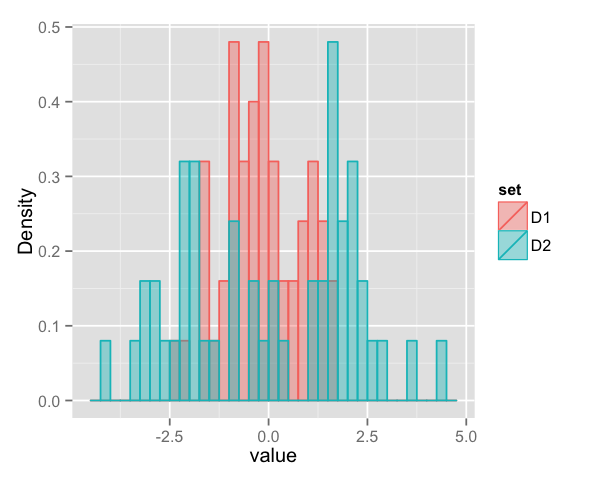

In [3]:
p <- ggplot(data) +
            aes(x = value,
                color = set,
                fill = set,
               ..density..)

p <- p + geom_histogram(position='identity',
                           alpha=I(0.4),
                            binwidth=0.25
                        ) +
        ylab("Density")
p

### b) What happens if you run a parametric 2-sample test? What about a non-parametric one?

In [4]:
set1 <- subset(data,data$set == 'D1')
set2 <- subset(data,data$set != 'D1')

t.test(set1$value,set2$value)
wilcox.test(set1$value,set2$value)


	Welch Two Sample t-test

data:  set1$value and set2$value
t = -0.48362, df = 69.911, p-value = 0.6302
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8342024  0.5086024
sample estimates:
mean of x mean of y 
  -0.1600    0.0028 



	Wilcoxon rank sum test with continuity correction

data:  set1$value and set2$value
W = 1155, p-value = 0.5147
alternative hypothesis: true location shift is not equal to 0


### c) Now plot the data as a Cumulative Distribution Function -- look up `stat_ecdf` from `ggplot2`. Although the means of the data sets are similar, their distributions definitely have a distinct shape.

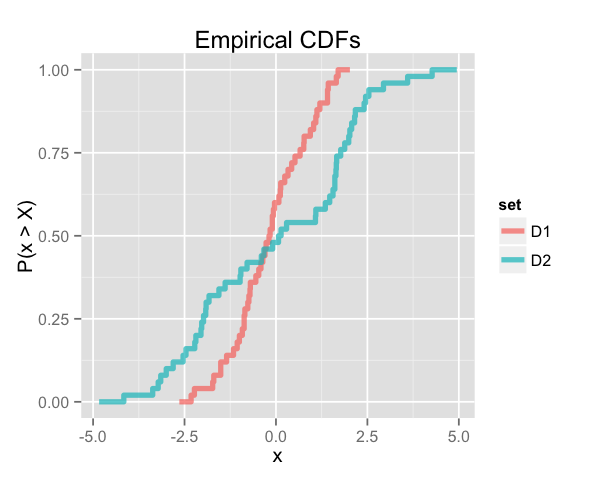

In [5]:
ggplot(data, aes(x=value,color=set)) + 
    stat_ecdf(geom = "step",
                size = 1.5,
             alpha=I(0.7)) +
    ggtitle("Empirical CDFs") +
    ylab("P(x > X)") + xlab("x")

### d) The Kolmogorov-Smirnov test is a non-parametric test used to investigate the “shape” of a distribution. See what happens when you run `ks.test`.

In [6]:
ks.test(set1$value,set2$value)

Warning message:
In ks.test(set1$value, set2$value): cannot compute exact p-value with ties


	Two-sample Kolmogorov-Smirnov test

data:  set1$value and set2$value
D = 0.36, p-value = 0.003068
alternative hypothesis: two-sided


## Problem 5 - Faking Data

Let’s try a little computer simulation, generating “fake” random data to help us understand how often false positive can occur.

### a) One trial is defined as follows: take two random samples (n = 10) from a normal distribution and run a two-sample t-test on them, taking note of the p-value. Write a function to run a trial.

In [7]:
runTrial <- function(numSamples){
    samples <- c(rnorm(numSamples),rnorm(numSamples))
    test <- t.test(samples,paired=FALSE)
    return(test$p.value)
}

p <- runTrial(100)
p

[1] 0.4915661

### b) One experiment is 100 trials. So you should have 100 p-values at the end of an experiment. Write a function to run an experiment, then use it. In the course of one experiment, how often are the two random samples significantly different from each other (at the level of $\alpha = 0.05$)? Take a note of that number.

In [8]:
runExperiment <- function(numTrials,numSamples){
    pValue <- vector("numeric",numTrials)
    for(trial in seq(1,numTrials)){
        pValue[trial] <- runTrial(numSamples)
    }
    return(pValue)
}

ps <- runExperiment(100,10)
length(subset(ps,ps<0.05))

[1] 8

### c) Run the above experiment 100 more times (consider writing a function to do this). The number of statistically different “data sets” is always very close to 5. Why do you think this may be the case? What implications does it have for t-tests? We’ll cover this more in detail in the next few lectures.

In [9]:
runMetaExperiment <- function(numExperiments,numTrials,numSamples){
    falsePositiveFracs <- vector("numeric",numTrials)
    
    for(experiment in seq(1,numExperiments)){
        ps <- runExperiment(numTrials,numSamples)
        falsePositiveFracs[experiment] <- length(subset(ps,ps<0.05))/100
    }
    
    return(falsePositiveFracs)
}

results <- data.frame(falsePositives = runMetaExperiment(100,100,10))

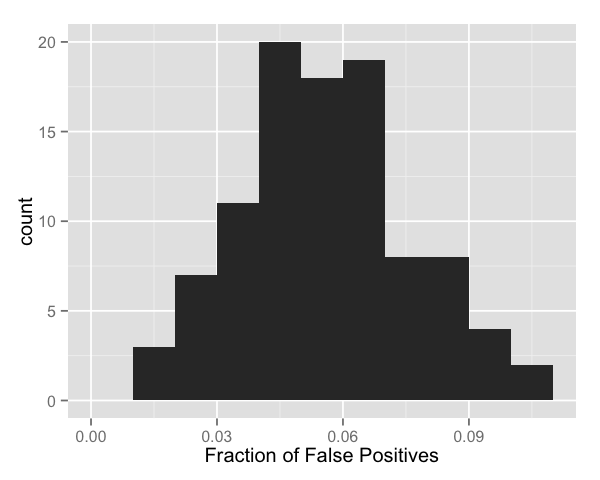

In [10]:
qplot(x=results$falsePositives,
     binwidth=0.01) + xlab("Fraction of False Positives")